In [1]:
### 3D game
import math
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d


In [2]:
def EWA(X, a=0.18, b=1.41, M = 1.0):
    x0,y0,z0 = X
    x1,y1,z1 = 1.0-x0,1.0-y0,1.0-z0
    
    a11 = 0.0
    a12 = 1.0
    a21 = M
    a22 = 0.0
    
    Ax0 = a11*x0+a12*x1
    Ax1 = a21*x0+a22*x1
    
    Ay0 = a11*y0+a12*y1
    Ay1 = a21*y0+a22*y1
    
    Az0 = a11*z0+a12*z1
    Az1 = a21*z0+a22*z1
    
    XNum = math.pow(x0,1.0-a)
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*(Az1-Az0))
    
    YNum = math.pow(y0,1.0-a)
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*(Ax1-Ax0))
    
    ZNum = math.pow(z0,1.0-a)
    ZDenom = ZNum + math.pow(z1,1.0-a)*math.exp(b*(Ay1-Ay0))
    
    return [XNum / XDenom, YNum / YDenom, ZNum / ZDenom]

In [3]:
def EWA_Alt (X, a=0.18, b=1.41, M = 1.0):
    x0,y0,z0 = X
    x1,y1,z1 = 1.0-x0, 1.0-y0, 1.0-z0
    
    a11 = 0.0
    a12 = 1.0
    a21 = M
    a22 = 0.0
    
    Az0 = a11*z0+a12*z1
    Az1 = a21*z0+a22*z1
    
    XNum = math.pow(x0,1.0-a)
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*(Az1-Az0))
    
    x0 = XNum / XDenom
    x1 = 1.0-x0
    Ax0 = a11*x0+a12*x1
    Ax1 = a21*x0+a22*x1
    
    YNum = math.pow(y0,1.0-a)
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*(Ax1-Ax0))
    
    y0 = YNum / YDenom
    y1 = 1.0-y0
    Ay0 = a11*y0+a12*y1
    Ay1 = a21*y0+a22*y1
    
    ZNum = math.pow(z0,1.0-a)
    ZDenom = ZNum + math.pow(z1,1.0-a)*math.exp(b*(Ay1-Ay0))
    
    return [x0, y0, ZNum / ZDenom]

In [69]:
a,b,M = 0.4, 1.41, 1.0

In [82]:
N = 1000
init = [.8, .8, .3]
traj = [init]
X = init
for i in range(0,N):
    X = EWA(X,a,b,M)
    traj . append ( X )
x,y,z = zip(*traj[:])

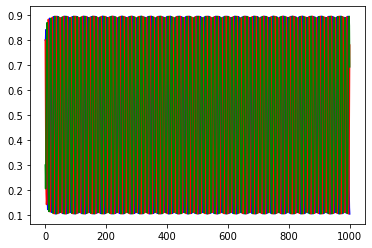

In [83]:
plt.plot(x, 'b', y, 'r', z, 'g')

In [84]:
fig = plt.figure()
#ax = plt.axes(projection='3d')

<Figure size 432x288 with 0 Axes>

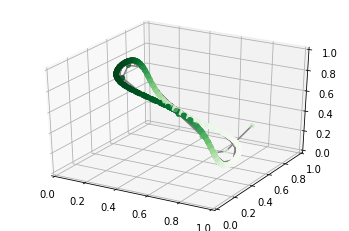

In [85]:
ax = plt.axes(projection='3d')
ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)
# Data for a three-dimensional line

ax.plot3D(x, y, z, 'gray');

# # Data for three-dimensional scattered points
# zdata = 15 * np.random.random(100)
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(x, y, z, c=z, cmap='Greens');